In [1]:
import sys
import keras
import pandas as pd
# import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.0-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.10.8 (main, Oct 13 2022, 09:48:40) [Clang 14.0.0 (clang-1400.0.29.102)]
Pandas 1.5.1
SciPy 1.9.3
GPU is available


In [2]:
# Reference
# https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763

# load MNIST dataset
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

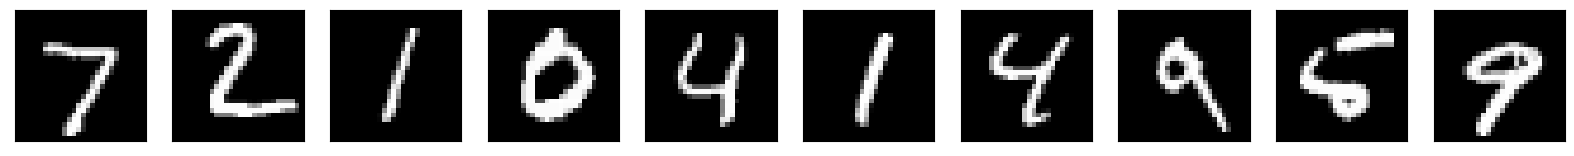

In [3]:
# show dataset images
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [5]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

# Encoding 
# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

Metal device set to: Apple M1 Pro


2022-11-18 20:51:17.284891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 20:51:17.285103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# The decoding process
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [9]:
!tensorboard --logdir=/tmp/autoencoder

2022-11-18 20:53:10.573754: F tensorflow/c/experimental/stream_executor/stream_executor.cc:808] Non-OK-status: stream_executor::MultiPlatformManager::RegisterPlatform( std::move(cplatform)) status: INTERNAL: platform is already registered with name: "METAL"


In [10]:
# train autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

Epoch 1/50


2022-11-18 20:53:45.835751: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-18 20:53:46.167169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.6978

2022-11-18 20:53:59.840651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 15s 25ms/step - loss: 0.6978 - val_loss: 0.6957
Epoch 2/50
469/469 [==============================] - 11s 23ms/step - loss: 0.6936 - val_loss: 0.6913
Epoch 3/50
469/469 [==============================] - 10s 22ms/step - loss: 0.6886 - val_loss: 0.6854
Epoch 4/50
469/469 [==============================] - 10s 22ms/step - loss: 0.6806 - val_loss: 0.6743
Epoch 5/50
469/469 [==============================] - 11s 23ms/step - loss: 0.6619 - val_loss: 0.6437
Epoch 6/50
469/469 [==============================] - 10s 22ms/step - loss: 0.5964 - val_loss: 0.5270
Epoch 7/50
469/469 [==============================] - 11s 22ms/step - loss: 0.4784 - val_loss: 0.4622
Epoch 8/50
469/469 [==============================] - 10s 22ms/step - loss: 0.4506 - val_loss: 0.4460
Epoch 9/50
469/469 [==============================] - 10s 22ms/step - loss: 0.4348 - val_loss: 0.4303
Epoch 10/50
469/469 [==============================] - 10s 22ms/step - loss: 0.4191 - val_los

 18/313 [>.............................] - ETA: 1s

2022-11-18 21:03:46.044986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


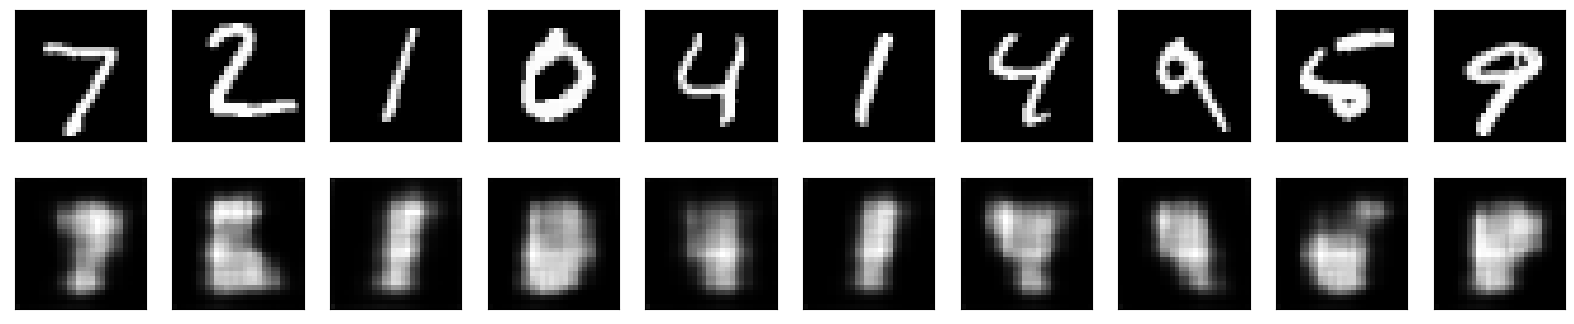

In [11]:
# See trained Model prediction result
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()